## EDA (Exploratory Data Anlysis)

Realizaremos un análisis exploratorio sobre las variables que se van a utilizar en el modelo

Importamos las librerías necesarias

In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Leeremos el archivo previamente transformadas en el proceso de ETL

In [379]:
df = pd.read_parquet('_src\Data\steam_games_transform.parquet')

In [380]:
df

,publisher,genres,app_name,discount_price,specs,price,early_access,developer,sentiment,metascore,year
0,Kotoshiro,"Action, Casual, Indie, Simulation, Strategy",Lost Summoner Kitty,4.49,Single-player,4.99,False,Kotoshiro,sin clasificar,NaN,2018
1,"Making Fun, Inc.","Free to Play, Indie, RPG, Strategy",Ironbound,NaN,"Single-player, Multi-player, Online Multi-Play...",0.00,False,Secret Level SRL,Mostly Positive,NaN,2018
2,Poolians.com,"Casual, Free to Play, Indie, Simulation, Sports",Real Pool 3D - Poolians,NaN,"Single-player, Multi-player, Online Multi-Play...",0.00,False,Poolians.com,Mostly Positive,NaN,2017
3,彼岸领域,"Action, Adventure, Casual",弹炸人2222,0.83,Single-player,0.99,False,彼岸领域,sin clasificar,NaN,2017
5,Trickjump Games Ltd,"Action, Adventure, Simulation",Battle Royale Trainer,NaN,"Single-player, Steam Achievements",3.99,False,Trickjump Games Ltd,Mixed,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...
32129,Bidoniera Games,"Action, Adventure, Casual, Indie",Kebab it Up!,1.69,"Single-player, Steam Achievements, Steam Cloud",1.99,False,Bidoniera Games,sin clasificar,NaN,2018
32130,Ghost_RUS Games,"Casual, Indie, Simulation, Strategy",Colony On Mars,1.49,"Single-player, Steam Achievements",1.99,False,"Nikita ""Ghost_RUS""",sin clasificar,NaN,2018
32131,Sacada,"Casual, Indie, Strategy",LOGistICAL: South Africa,4.24,"Single-player, Steam Achievements, Steam Cloud...",4.99,False,Sacada,sin clasificar,NaN,2018
32132,Laush Studio,"Indie, Racing, Simulation",Russian Roads,1.39,"Single-player, Steam Achievements, Steam Tradi...",1.99,False,Laush Dmitriy Sergeevich,sin clasificar,NaN,2018


In [381]:
df.shape

(29777, 11)

Analizamos si hay valores nulos en el modelo

In [382]:
df.isna().sum().sort_values(ascending=False)

discount_price    29573
metascore         27232
genres             1234
price              1001
specs               669
publisher             0
app_name              0
early_access          0
developer             0
sentiment             0
year                  0
dtype: int64

Como _`discount_price`_ tiene la mayoría de sus datos nulos, lo eliminaremos de nuestro DataFrame

In [383]:
df.drop(columns=['discount_price'], inplace=True)

El modelo nos pide predecir precio. Así que, eliminaremos los NaN de  _`price`_

In [384]:
df.dropna(subset=['price'], inplace=True)

Como los nombres son únicos, verificaremos los valores duplicados por la columna _`app_name`_

In [385]:
df['app_name'].duplicated().any()

True

In [386]:
df['app_name'].value_counts()

app_name
Soundtrack                                        3
Parasite                                          2
Streamline                                        2
Wolfenstein II: The New Colossus                  2
Batman: Arkham City - Game of the Year Edition    2
                                                 ..
Cycle (轮回)                                        1
Fable Fortune                                     1
ROAD OF DANGER                                    1
Dysfunctional Systems: Orientation                1
EXIT 2 - Directions                               1
Name: count, Length: 28749, dtype: int64

In [387]:
df[df['app_name'] == 'Wolfenstein II: The New Colossus']

,publisher,genres,app_name,specs,price,early_access,developer,sentiment,metascore,year
13894,Bethesda Softworks,Action,Wolfenstein II: The New Colossus,"Single-player, Steam Achievements, Full contro...",59.99,False,Machine Games,Mostly Positive,86.0,2017
14573,Bethesda Softworks,Action,Wolfenstein II: The New Colossus,"Single-player, Steam Achievements, Full contro...",59.99,False,Machine Games,Mostly Positive,86.0,2017


Eliminaremos los valores duplicados

In [388]:
df.drop_duplicates(subset='app_name', inplace=True)

Dado que el **nombre** es único para cada juego y no aporta información útil para predecir el **precio**, también eliminaremos la columna _`app_name`_

In [389]:
df.drop(columns=['app_name'], inplace=True)

Separaremos la columna _`genres`_ y _`specs`_ por comas y la vez agregaremos una nueva fila por cada valor

In [390]:
df["genres"]=df["genres"].str.split(", ")
df=df.explode("genres")

In [391]:
df["specs"]=df["specs"].str.split(", ")
df=df.explode("specs")

Eliminaremos los NaN en  _`metascore`_, _`specs`_ y _`genres`_

In [392]:
df.dropna(subset=['metascore'], inplace=True)
df.dropna(subset=['specs'], inplace=True)
df.dropna(subset=['genres'], inplace=True)

Verificamos el tipo de datos de nuestras columnas

In [393]:
print(df['genres'].apply(type).value_counts())
print(df['publisher'].apply(type).value_counts())
print(df['specs'].apply(type).value_counts())
print(df['price'].apply(type).value_counts())
print(df['early_access'].apply(type).value_counts())
print(df['developer'].apply(type).value_counts())
print(df['sentiment'].apply(type).value_counts())
print(df['metascore'].apply(type).value_counts())
print(df['year'].apply(type).value_counts())

genres
<class 'str'>    25226
Name: count, dtype: int64
publisher
<class 'str'>    25226
Name: count, dtype: int64
specs
<class 'str'>    25226
Name: count, dtype: int64
price
<class 'float'>    25226
Name: count, dtype: int64
early_access
<class 'bool'>    25226
Name: count, dtype: int64
developer
<class 'str'>    25226
Name: count, dtype: int64
sentiment
<class 'str'>    25226
Name: count, dtype: int64
metascore
<class 'float'>    25226
Name: count, dtype: int64
year
<class 'str'>    25226
Name: count, dtype: int64


Cambiamos la columna _`year`_ a número

In [394]:
df['year'] = pd.to_numeric(df['year'])

Las columnas _`publisher`_ y _`developer`_ presentan una alta complejidad y dimensionalidad, dificultando su categorización, por lo tanto las eliminaremos.

In [395]:
df.drop(columns=['publisher', 'developer'], inplace=True)

Realizaremos algunas gráficas para ver la relación que hay entre la variable _`precio`_ y las variables categóricas _`early_access`_, y _`sentiment`_ y _`specs`_

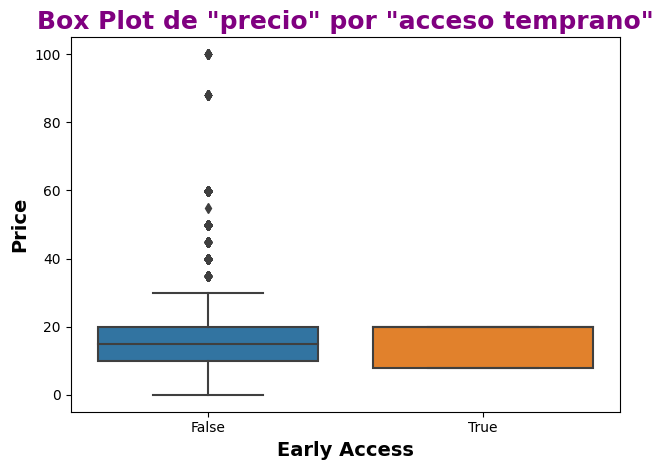

In [396]:
#Box Plot para precio por acceso temprano
sns.boxplot(x='early_access', y='price', data=df)
plt.xlabel('Early Access', weight='bold', size=14)
plt.ylabel('Price', weight='bold', size=14)
plt.title('Box Plot de "precio" por "acceso temprano"', family='sans-serif', color='purple', weight='bold', size= 18)
plt.tight_layout()
plt.show()

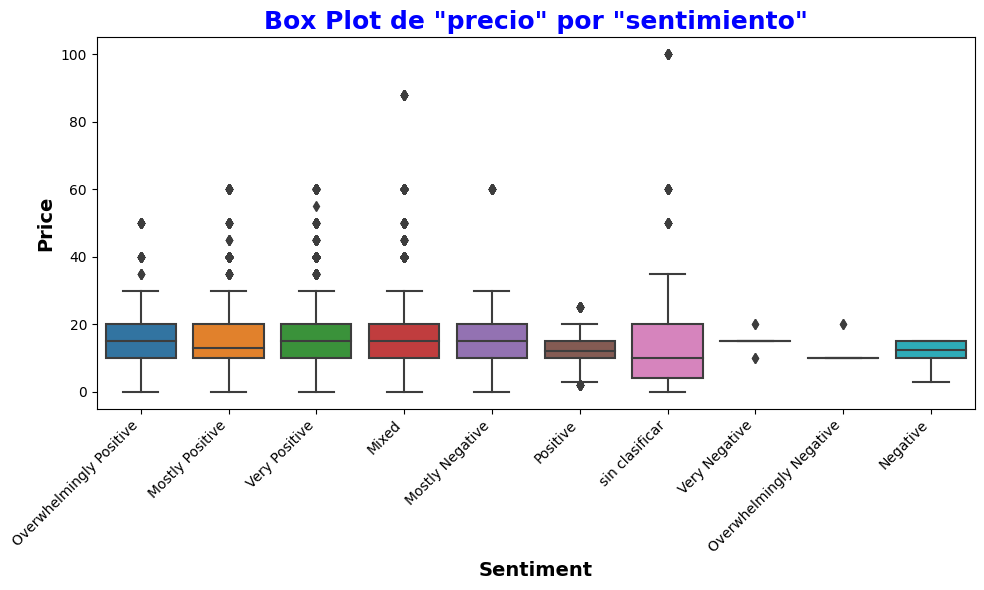

In [397]:
#Box Plot para precio por sentimiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='price', data=df)
plt.xlabel('Sentiment', weight='bold', size=14)
plt.ylabel('Price', weight='bold', size=14)
plt.title('Box Plot de "precio" por "sentimiento"', family='sans-serif', color='blue', weight='bold', size= 18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

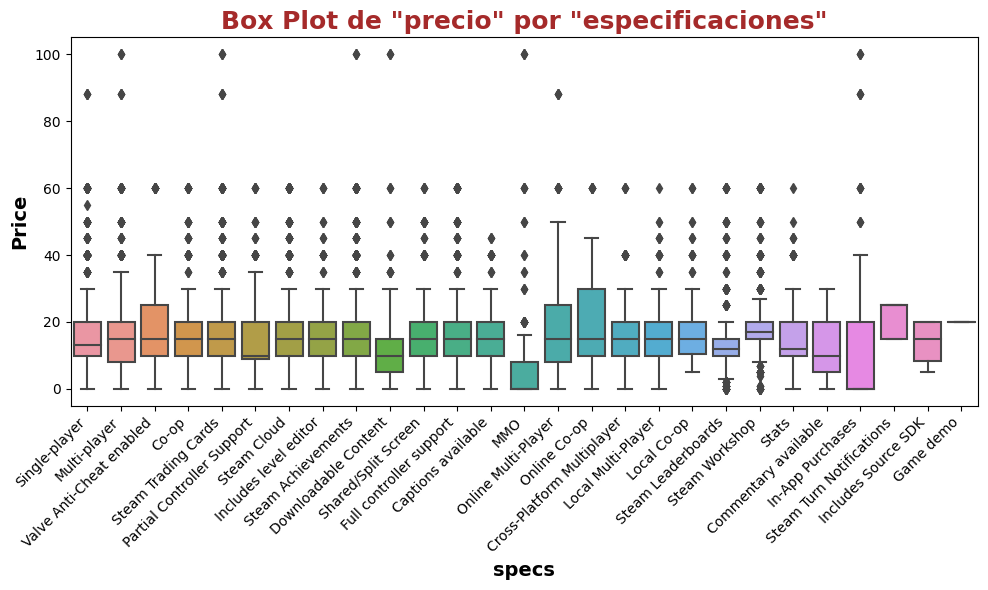

In [398]:
#Box Plot para precio por especificaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='specs', y='price', data=df)
plt.xlabel('specs', weight='bold', size=14)
plt.ylabel('Price', weight='bold', size=14)
plt.title('Box Plot de "precio" por "especificaciones"', family='sans-serif', color='brown', weight='bold', size= 18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Al analizar la relación entre el **precio** y las variables _`early_access`_, y _`sentiment`_ y _`specs`_, mediante un gráfico de cajas, se puede observar que hay una mínima variabilidad en el precio y se podría podría concluir que la presencia o ausencia de estas tres variables no tiene un impacto significativo en el **precio**; por las razón eliminaremos esas 3 columnas.

In [399]:
df.drop(columns=['early_access', 'sentiment', 'specs'], inplace=True)

Ahora que eliminamos la columna _`specs`_, existiran filas duplicadas porque la columna _`genres`_ fue la que desanidamos primero. Por eso, eliminaremos todas las filas duplicadas 

Ahora analizaremos las variables _`price`_ y _`metascore`_ para ver si hay valores atípicos

In [400]:
df = df.drop_duplicates()

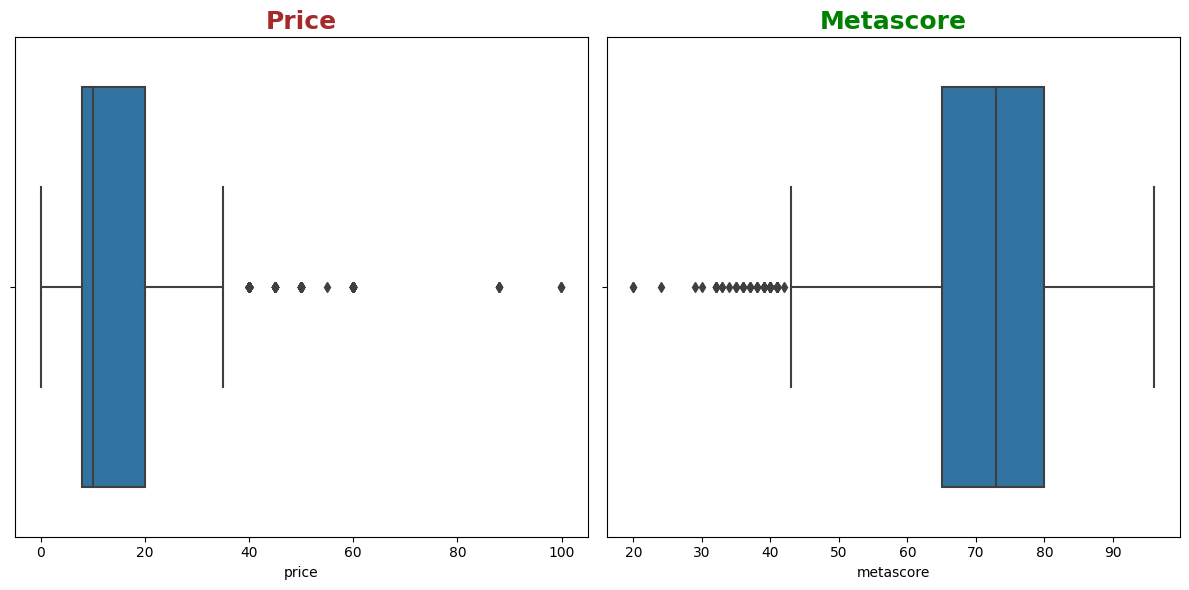

In [401]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

sns.boxplot(x=df["price"], ax=axes[0])
axes[0].set_title("Price", family='sans-serif', color='brown', weight='bold', size= 18)

sns.boxplot(x=df["metascore"], ax=axes[1])
axes[1].set_title("Metascore", family='sans-serif', color='green', weight='bold', size= 18)

plt.tight_layout()
plt.show()

In [402]:
(np.min(df['price']), np.quantile(df['price'], 0.25), np.median(df['price']), 
np.quantile(df['price'], 0.75), np.max(df['price']))

(0.0, 7.99, 9.99, 19.99, 99.99)

In [403]:
(np.min(df['metascore']), np.quantile(df['metascore'], 0.25), np.median(df['metascore']), 
np.quantile(df['metascore'], 0.75), np.max(df['metascore']))

(20.0, 65.0, 73.0, 80.0, 96.0)

Eliminaremos los valores atípicos en _`price`_ y _`metascore`_ 

In [404]:
# Para esto, tenemos que calcular el IQR (Rango Interquartile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

In [405]:
# Hacemos lo mismo con metascore
Q1 = df['metascore'].quantile(0.25)
Q3 = df['metascore'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['metascore'] >= limite_inferior) & (df['metascore'] <= limite_superior)]

Reseteamos los índices

In [406]:
df.reset_index(drop=True, inplace=True)
df

,genres,price,metascore,year
0,Action,9.99,96.0,1998
1,Strategy,6.99,84.0,2006
2,Strategy,6.99,80.0,2006
3,Action,9.99,76.0,2006
4,Indie,9.99,76.0,2006
...,...,...,...,...
4140,Action,14.99,88.0,2002
4141,Adventure,14.99,88.0,2002
4142,Action,4.99,79.0,2003
4143,Action,14.99,93.0,2004


Cambiar la columna _`genres`_ a minúscula

In [407]:
df['genres'] = df['genres'].str.lower()

In [408]:
df["genres"].unique()

array(['action', 'strategy', 'indie', 'rpg', 'casual', 'adventure',
       'racing', 'simulation', 'massively multiplayer', 'sports',
       'free to play', 'early access', 'video production'], dtype=object)

Como la variable _`genres`_ es categórica, usaremos **One-Hot Encoding**

In [409]:
df=pd.get_dummies(df, columns=['genres'], prefix='', prefix_sep='')

In [428]:
df.head(3)

,price,metascore,year,action,adventure,casual,early access,free to play,indie,massively multiplayer,racing,rpg,simulation,sports,strategy,video production
0,9.99,96.0,1998,True,False,False,False,False,False,False,False,False,False,False,False,False
1,6.99,84.0,2006,False,False,False,False,False,False,False,False,False,False,False,True,False
2,6.99,80.0,2006,False,False,False,False,False,False,False,False,False,False,False,True,False


Importaremos el archivo en formato parquet porque pesa menos

In [429]:
df.to_parquet('_src/Data/steam_games_modelo.parquet')